In [127]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

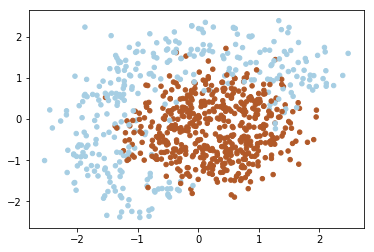

In [167]:
with open('train.npy', 'rb') as fin:
    X = np.load(fin)
    
with open('target.npy', 'rb') as fin:
    y = np.load(fin)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=20)
plt.show()


In [129]:
def expand(X):
    X_expanded = np.zeros((X.shape[0], 6))
    
    X_expanded[:,0], X_expanded[:,1] = X[:,0],X[:,1]
    X_expanded[:,2], X_expanded[:,3]= X[:,0]**2, X[:,1]**2
    X_expanded[:,4], X_expanded[:,5] = X[:,0]*X[:,1], np.ones(X.shape[0])
    
    return X_expanded

In [130]:
X_expanded = expand(X)
X_expanded.shape

(826, 6)

In [168]:
X_train, y_train = X_expanded[:626], y[:626]
X_test, y_test = X_expanded[626:], y[626:]

In [170]:
# hypothesis
def sigmoid(X, w):
    z = np.dot(X, w)
    return 1/(1 + np.exp(-z))


In [174]:
#criteria: in logistic regression the optimals parameters w are found by cross entropy minimisation
def loss(X,y,w):
    l = X.shape[0] 
    a = sigmoid(X, w)
    cross_entropy = y*np.log(a) +(1-y)*np.log(1-a)
    cost = -np.sum(cross_entropy)/l
    return cost

In [173]:
def grad(X, y, w):
    m = X.shape[0]
    A = sigmoid(X, w)
    dZ = A - y
    #cost = compute_loss(X, y, w)
    dW = np.dot(dZ, X) / m
    return dW

In [175]:
weight = np.array([0, 0, 0, 0, 0, 1])
grad(X_train, y_train, weight)

array([-0.16534771,  0.15373933,  0.40628315,  0.42455328,  0.19067129,
        0.12083494])

In [176]:
from IPython import display
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

def visualize(X, y, w, history):
    """draws classifier prediction with matplotlib magic"""
    Z = sigmoid(expand(np.c_[xx.ravel(), yy.ravel()]), w)
    Z = Z.reshape(xx.shape)
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.subplot(1, 2, 2)
    plt.plot(history)
    plt.grid()
    ymin, ymax = plt.ylim()
    plt.ylim(0, ymax)
    display.clear_output(wait=True)
    plt.show()

[ 0.74178323 -0.70847909 -0.63335331 -0.69155114 -0.4033413   1.55964858]


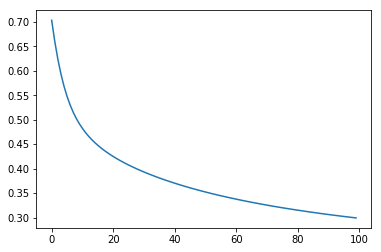

In [177]:
# Then we can now train or model using stochastic gradient descent
w = np.array([0, 0, 0, 0, 0, 1])

eta= 0.1 # learning rate

n_iter = 100
lost = np.zeros(n_iter)
for i in range(n_iter):
    lost[i] = loss(X_train, y_train, w)

    w = w - eta * grad(X_train, y_train, w)

print(w)
plt.plot(list(range(len(lost))), lost)
plt.show()

In [181]:
def predict(X, opt_w):
    z = np.dot(X, opt_w)
    return np.where(1/(1 + np.exp(-z)) > 0.5, 1, 0)

In [182]:
y_pred= predict(X_test, w)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0])

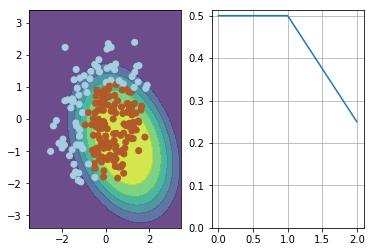

In [184]:
visualize(X_test, y_pred, w, [0.5, 0.5, 0.25])